In [4]:
# ===============================
# Core Libraries
# ===============================
import numpy as np
import pandas as pd

# ===============================
# Visualization Libraries
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Machine Learning Libraries
# ===============================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



# ===============================
# Model Saving
# ===============================
import joblib

# ===============================
# Deployment Library
# ===============================
import gradio as gr

# ===============================
# Warnings
# ===============================
import warnings
warnings.filterwarnings("ignore")


In [5]:
# Load the dataset
df = pd.read_csv("Merged_IDS_Dataset.csv")

# Display first 5 rows
df.head()


,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,214392,9,21,388.0,24564.0,194.0,0.0,43.111111,85.545959,1460.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,2376792,9,3,752.0,0.0,188.0,0.0,83.555556,99.084700,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,131350,10,3,7564.0,0.0,1460.0,0.0,756.400000,690.497277,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,164796,6,3,770.0,0.0,385.0,0.0,128.333333,198.813145,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,163418,6,3,400.0,0.0,200.0,0.0,66.666667,103.279556,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [6]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nDataset Info:")
df.info()


Dataset Shape: (447915, 77)

Column Names:
 Index(['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SY

In [7]:
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values:
 Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
                             ..
Idle Mean                     0
Idle Std                      0
Idle Max                      0
Idle Min                      0
Label                         0
Length: 77, dtype: int64

Duplicate Rows: 141742


In [8]:
df.describe()


,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,4.479150e+05,447915.000000,447915.000000,4.479150e+05,4.479150e+05,447915.000000,447915.000000,447915.000000,447915.000000,447915.000000,...,447915.000000,4.479150e+05,4.479150e+05,4.479150e+05,4.479150e+05,4.479150e+05,4.479150e+05,4.479150e+05,4.479150e+05,447915.000000
mean,5.983003e+05,22.598428,27.238503,4.778406e+03,2.170251e+04,174.243153,14.918360,71.264324,64.000867,365.009993,...,25.926651,1.868487e+04,9.409518e+03,3.126578e+04,1.252120e+04,9.859284e+04,3.341817e+03,1.026228e+05,9.578854e+04,1.005829
std,4.878777e+06,127.986936,116.638803,1.518561e+05,1.477431e+05,352.171446,71.570572,184.565303,156.387353,555.808533,...,9.017636,7.487275e+05,5.231382e+05,1.174788e+06,6.397847e+05,2.222806e+06,2.201782e+05,2.260988e+06,2.207332e+06,2.095053
min,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.490000e+02,1.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,5.788000e+03,3.000000,2.000000,9.000000e+01,1.060000e+02,45.000000,0.000000,9.346154,0.000000,48.000000,...,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,1.792405e+05,17.000000,15.000000,4.860000e+02,1.512000e+03,163.000000,0.000000,50.000000,29.277002,731.000000,...,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
max,1.199975e+08,20038.000000,11021.000000,2.605270e+07,1.421599e+07,1476.000000,1472.000000,1474.000000,848.528137,1460.000000,...,40.000000,1.104063e+08,7.417760e+07,1.104063e+08,1.104063e+08,1.191926e+08,7.214360e+07,1.191926e+08,1.191926e+08,9.000000


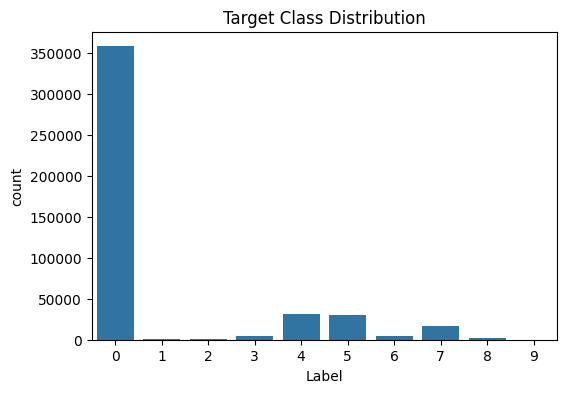

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=df)
plt.title("Target Class Distribution")
plt.show()


In [10]:
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])


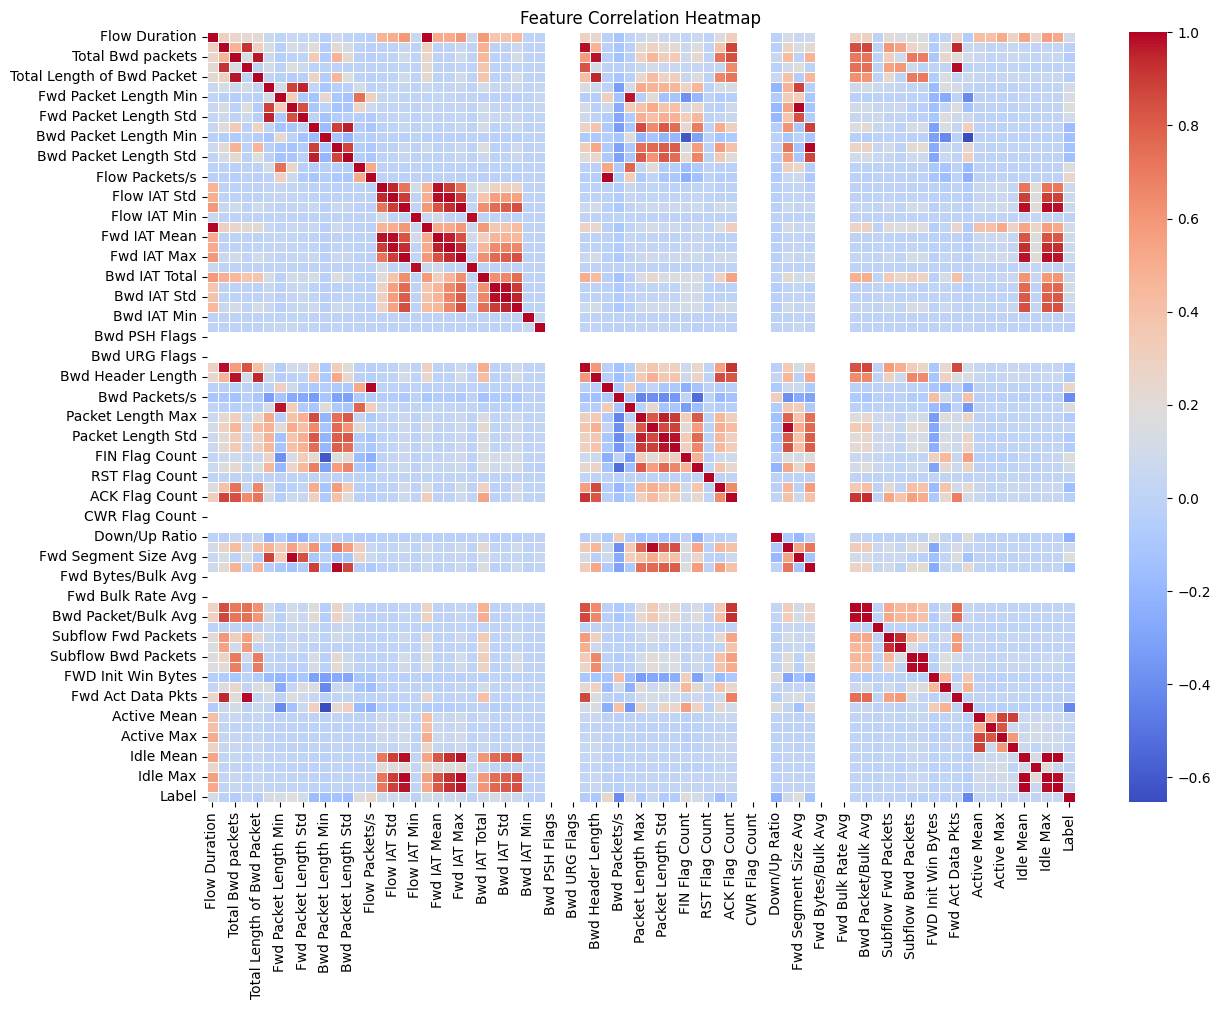

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [12]:
X = df.drop('Label', axis=1)
y = df['Label']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Training Multiple ML Models:

In [14]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=15),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        n_jobs=-1
    )
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, average='weighted'),
        "Recall": recall_score(y_test, preds, average='weighted'),
        "F1-Score": f1_score(y_test, preds, average='weighted')
    }

pd.DataFrame(results).T



,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.899702,0.914794,0.899702,0.898894
Decision Tree,0.933447,0.939787,0.933447,0.933185
Random Forest,0.938459,0.945705,0.938459,0.938207


In [15]:
best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X_train, y_train)

joblib.dump(best_model, "ids_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

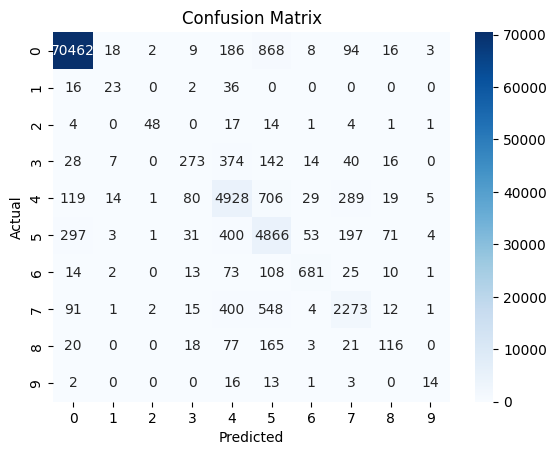

In [16]:
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


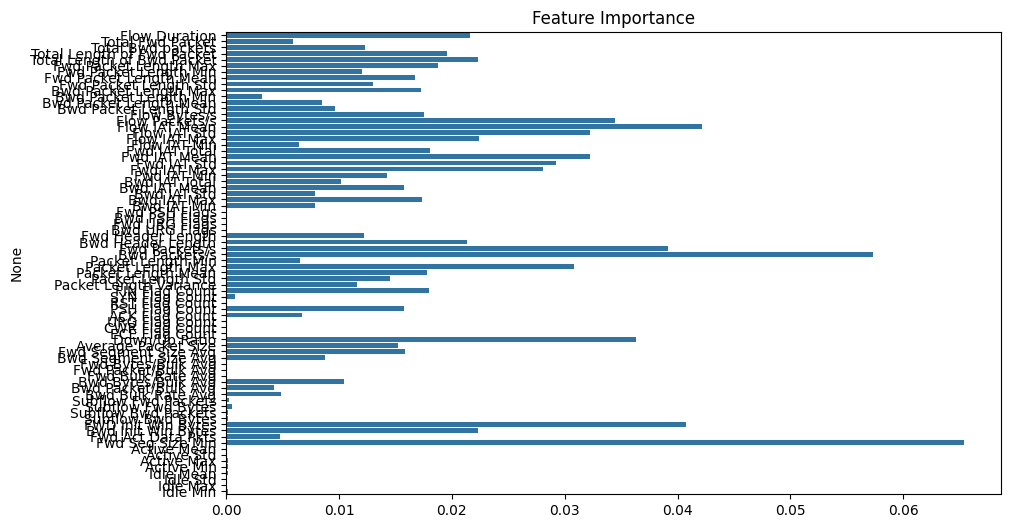

In [17]:
importances = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


DEPLOYMENT SECTION:

In [18]:
# Load trained model and scaler
model = joblib.load("ids_model.pkl")
scaler = joblib.load("scaler.pkl")

# Prediction function
def predict_intrusion(*inputs):
    data = np.array(inputs).reshape(1, -1)
    data = scaler.transform(data)
    prediction = model.predict(data)[0]
    
    return "🚨 Attack Detected" if prediction == 1 else "✅ Normal Traffic"

# Gradio Interface
interface = gr.Interface(
    fn=predict_intrusion,
    inputs=[gr.Number(label=col) for col in X.columns],
    outputs=gr.Textbox(label="Prediction Result"),
    title="Intrusion Detection System using Machine Learning",
    description="This system predicts whether network traffic is Normal or an Attack."
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
